In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.25.3'

In [26]:
xl = pd.ExcelFile(r'IAC_5_Dataset_cleaned.xlsx')
res = xl.sheet_names
res

['Basic Indicators',
 'Health',
 'Nutrition',
 'HIV-AIDS',
 'Education',
 'Demographic Indicators',
 'Women',
 'Child Protection',
 'Adolescents',
 'Disparities by Residence',
 'Disparities by Household Wealth',
 'Early Childhood Development',
 'Economic Indicators',
 'Regional',
 'perCapitaNominalGDP']

In [27]:
filteredcol='Education'
df=pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name=filteredcol,header=0,index_col=0,na_values='–')

In [28]:
economy = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Economic Indicators',header=0,index_col=0,na_values='–')
demographics = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Demographic Indicators',header=0,index_col=0,na_values='–')
Regional = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Regional',header=0,na_values='–')

In [5]:
#Regional.isnull().sum()

In [6]:
#df.columns = [res[0]+' '+ col for col in df.columns]

In [7]:
# for sheet in res[1:]:
#     temp_df = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name=sheet,header=0,index_col=0,na_values='–')
#     temp_df.columns = [sheet+' '+ col for col in temp_df.columns]
#     df = df.join(temp_df, how='inner')
#     del temp_df

In [37]:
df

,(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*,Number per 100 population 2016mobile phones,Number per 100 population 2016internet users,(Female to male ratio Pre-primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*,(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*,(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*,(Female to male ratio Lower secondary school participationNet enrolment ratio (%)2011–2016*
Countries and areas,,,,,,,,,,
Afghanistan,0.518967,66.003744,10.595726,NaN,0.692001,NaN,0.727770,NaN,NaN,0.606309
Albania,0.996420,105.062312,66.363445,0.974104,0.967061,0.985553,1.004338,1.365271,1.013348,0.993724
Algeria,0.958149,117.020110,42.945527,1.006590,0.942659,NaN,0.998974,NaN,1.017514,NaN
Andorra,1.000000,87.189733,97.930637,NaN,NaN,NaN,NaN,NaN,0.991101,NaN
Angola,0.831760,55.275647,13.000000,1.470213,0.639827,0.769498,0.993430,5.314611,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,0.905249,75.146186,20.074736,1.029387,0.942350,0.960017,0.989823,1.200947,1.021223,0.956493
Eastern and Southern Africa,0.972416,70.817102,21.218375,1.036441,0.940446,0.976180,1.021790,1.121733,1.051591,1.030608
West and Central Africa,0.793178,79.809916,18.842691,1.012417,0.944036,NaN,0.951130,NaN,0.990204,NaN


In [29]:
df.shape

(215, 11)

In [9]:
#list(df.index),len(df.index)

In [32]:
list(zip(df.columns,df.dtypes))

[('(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*',
  dtype('float64')),
 ('Number per 100 population 2016mobile phones', dtype('float64')),
 ('Number per 100 population 2016internet users', dtype('float64')),
 ('(Female to male ratio Pre-primary school participationGross enrolment ratio             (%)2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*',
  dtype('float64')),
 ('(Female to male ratio Lower se

In [33]:
## Deleting columns with more than 40% misssing values
df = df.drop(df.isnull().sum()[df.isnull().sum()/len(df.index)*100 >40].index, axis=1)


In [34]:
df.shape

(215, 10)

In [38]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesRegressor,RandomForestClassifier
def impute(df):
    columns = df.columns
    economy = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Economic Indicators',header=0,index_col=0,na_values='–').loc[:,['GDP (nominal) per capita']]
    demographics = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Demographic Indicators',header=0,index_col=0,na_values='–').loc[:,['Population (thousands)2016total','Population annual growth rate                    (%)1990-2016','Urbanized population               (%)2016']]
    Regional = pd.read_excel('IAC_5_Dataset_cleaned.xlsx', sheet_name='Regional',header=0,na_values='-')
    imputation_help_df = economy.merge(demographics, left_index = True, right_index = True ).merge(Regional, left_index = True, right_on='Countries').set_index('Countries')
    df = df.merge(imputation_help_df, left_index = True, right_index = True)
    df = pd.get_dummies(df)
    imputer = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=0), random_state =0,max_iter=200)
    x = imputer.fit_transform(df)
    x = pd.DataFrame(x, columns = df.columns, index = df.index).loc[:,columns]
    return x

In [39]:
df = impute(df)

/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [40]:
df.head(10)

,(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*,Number per 100 population 2016mobile phones,Number per 100 population 2016internet users,(Female to male ratio Pre-primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*,(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*,(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*,(Female to male ratio Lower secondary school participationNet enrolment ratio (%)2011–2016*
Afghanistan,0.518967,66.003744,10.595726,1.043181,0.692001,0.766072,0.727770,10.448619,0.869804,0.606309
Albania,0.996420,105.062312,66.363445,0.974104,0.967061,0.985553,1.004338,1.365271,1.013348,0.993724
Algeria,0.958149,117.020110,42.945527,1.006590,0.942659,0.964727,0.998974,1.463558,1.017514,1.010358
Andorra,1.000000,87.189733,97.930637,1.008004,1.000815,0.997982,1.006851,1.739064,0.991101,1.001184
Angola,0.831760,55.275647,13.000000,1.470213,0.639827,0.769498,0.993430,5.314611,0.912939,0.868582
Anguilla,1.006007,177.911592,81.570000,1.003721,0.985451,0.989489,1.009715,1.891276,1.008597,1.069970
Antigua and Barbuda,1.010479,194.082636,73.000000,0.976879,0.941845,0.972051,0.997732,1.089439,1.018545,1.061768
Argentina,1.003531,150.665685,70.150764,1.014263,0.995941,0.995941,1.009165,4.124026,1.004043,1.045641
Armenia,1.000579,114.779632,62.000000,1.029268,1.000343,0.997267,0.998995,1.077372,0.986610,0.993431
Australia,1.000232,109.606468,88.238658,0.971614,0.997831,1.006067,1.006167,0.801411,1.000119,1.028417


In [41]:
# df = df.dropna(axis=0, how='all')
# df = df.fillna(0)
x = df.select_dtypes(np.number)
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [16]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(x)

In [42]:
from sklearn.decomposition import FactorAnalysis
factorAnalysis = FactorAnalysis(n_components=8)
factorAnalysisComponents = factorAnalysis.fit_transform(x)

In [43]:
factorAnalysis.components_

array([[-1.05302191e-01, -6.49354391e-02, -1.07525688e-01,
        -1.50326627e-03, -1.18531290e-01, -1.25102981e-01,
        -8.59891808e-02,  2.27430044e-02, -5.27323387e-02,
        -7.29565314e-02],
       [ 1.46359039e-02, -6.43667280e-02, -1.34322351e-01,
         3.00175091e-02, -3.29979306e-02,  5.24552299e-04,
         1.65544195e-02, -4.58259017e-03,  5.94131946e-02,
         6.31766610e-02],
       [-6.89077293e-02, -6.70474074e-02, -1.73390047e-01,
         1.01453599e-02,  2.09708925e-02,  1.03681340e-02,
        -9.81587130e-03,  1.40961495e-02,  1.13170706e-02,
        -1.23370340e-02],
       [-3.70736042e-03, -1.70764675e-02,  1.50408517e-02,
         5.74644544e-02, -1.18214810e-02,  9.85677292e-03,
         2.11507633e-02, -3.40082541e-03, -3.24646620e-02,
        -1.02872471e-02],
       [-1.82849184e-02,  5.72831527e-02,  3.40951191e-02,
         2.25796350e-02,  2.22780557e-03, -3.11618227e-03,
         4.55093464e-03,  1.97800874e-02,  2.40451560e-02,
         4.

In [44]:
list(zip(df.columns, factorAnalysis.components_[0]))

[('(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*',
  -0.10530219051241754),
 ('Number per 100 population 2016mobile phones', -0.06493543908807559),
 ('Number per 100 population 2016internet users', -0.10752568789643056),
 ('(Female to male ratio Pre-primary school participationGross enrolment ratio             (%)2011–2016*',
  -0.0015032662653638785),
 ('(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*',
  -0.11853129049073635),
 ('(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*',
  -0.12510298114870694),
 ('(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*',
  -0.08598918078568588),
 ('(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*',
  0.022743004425216817),
 ('(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*',
  -0.052732338724309

In [27]:
# pca.components_

In [28]:
# pca.explained_variance_ratio_

In [45]:
df['Score'] = factorAnalysisComponents[:,0]

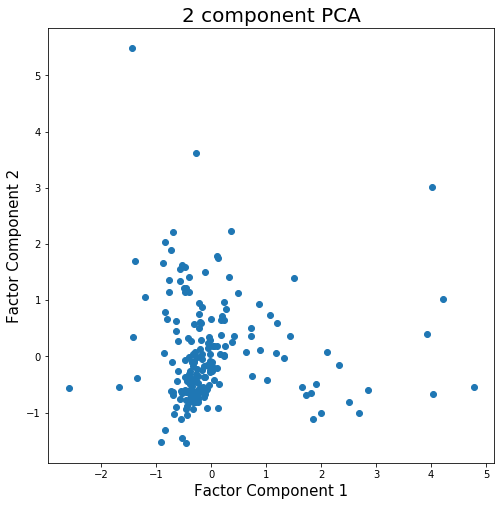

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor Component 1', fontsize = 15)
ax.set_ylabel('Factor Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(factorAnalysisComponents[:,0],factorAnalysisComponents[:,1])

In [31]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, n_iter=5000)
# tsneComponents = tsne.fit_transform(x)

In [32]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('TSNE Component 1', fontsize = 15)
# ax.set_ylabel('TSNE Component 2', fontsize = 15)
# ax.set_title('2 component TSNE', fontsize = 20)
# ax.scatter(tsneComponents[:,0],tsneComponents[:,1])

In [48]:
# tsne.n_iter_

849

In [49]:
# tsne.embedding_.shape

(204, 2)

In [47]:
df

,(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*,Number per 100 population 2016mobile phones,Number per 100 population 2016internet users,(Female to male ratio Pre-primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*,(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*,(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*,(Female to male ratio Lower secondary school participationNet enrolment ratio (%)2011–2016*,Score
Afghanistan,0.518967,66.003744,10.595726,1.043181,0.692001,0.766072,0.727770,10.448619,0.869804,0.606309,4.777214
Albania,0.996420,105.062312,66.363445,0.974104,0.967061,0.985553,1.004338,1.365271,1.013348,0.993724,0.017832
Algeria,0.958149,117.020110,42.945527,1.006590,0.942659,0.964727,0.998974,1.463558,1.017514,1.010358,0.375289
Andorra,1.000000,87.189733,97.930637,1.008004,1.000815,0.997982,1.006851,1.739064,0.991101,1.001184,-0.291621
Angola,0.831760,55.275647,13.000000,1.470213,0.639827,0.769498,0.993430,5.314611,0.912939,0.868582,4.018120
...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,1.063893,83.179894,23.119989,1.021450,0.982751,1.013877,1.019149,0.902911,1.038875,1.229146,-0.566869
Eastern Europe and Central Asia,0.997305,129.026756,63.669516,0.980146,0.995836,0.996034,1.010036,1.011147,1.002747,0.994702,-0.235588
Western Europe,0.998708,121.908813,82.525430,0.993192,0.997995,0.999868,1.006935,0.861986,1.002339,1.016738,-0.312618
Eastern and Southern Africa,0.972416,70.817102,21.218375,1.036441,0.940446,0.976180,1.021790,1.121733,1.051591,1.030608,0.239742


In [49]:
df.sort_values('Score', ascending=False)

,(Female to male ratio of Youth (15–24 years) literacy rate (%)2011–2016*,Number per 100 population 2016mobile phones,Number per 100 population 2016internet users,(Female to male ratio Pre-primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationGross enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet enrolment ratio (%)2011–2016*,(Female to male ratio Primary school participationNet attendance ratio (%)2011–2016*,(Female to male ratio Primary school participationOut-of-school rate of children of primary school age (%)2011–2016*,(Female to male ratio Primary school participationSurvival rate to last primary grade (%) 2011–2016*,(Female to male ratio Lower secondary school participationNet enrolment ratio (%)2011–2016*,Score
Afghanistan,0.518967,66.003744,10.595726,1.043181,0.692001,0.766072,0.727770,10.448619,0.869804,0.606309,4.777214
South Sudan,0.671008,24.500000,15.900000,0.947092,0.708238,0.761801,0.819317,1.128887,0.913363,0.845545,4.210215
Chad,0.550149,44.478881,5.000000,0.897485,0.767465,0.768631,0.883677,2.946510,0.854261,0.680847,4.035041
Angola,0.831760,55.275647,13.000000,1.470213,0.639827,0.769498,0.993430,5.314611,0.912939,0.868582,4.018120
Somalia,0.654050,58.124575,1.880000,0.933848,0.747929,0.778678,0.808511,10.260862,0.898560,0.824384,3.931634
...,...,...,...,...,...,...,...,...,...,...,...
Kiribati,1.028199,51.310757,13.700000,1.051038,1.032058,1.073928,1.043373,0.585975,1.056384,1.286557,-1.396686
Gambia,0.850630,139.628726,18.500000,1.049379,1.048354,1.097501,1.021705,0.737507,1.055760,1.159866,-1.420545
Lesotho,1.180407,106.574927,27.360000,1.038170,0.972499,1.034275,1.042222,0.849567,1.288952,1.761903,-1.444886
Senegal,0.834001,98.678026,25.664768,1.123701,1.119345,1.095979,1.022472,0.779033,1.076435,1.079134,-1.681619


In [50]:
df.to_csv('Education.csv')